<a href="https://colab.research.google.com/github/Amith71965/Computer_Vision_Imageprocessing/blob/main/PCA_image_Dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Amith Kumar Yadav

Roll No: U20ME234

Mechanical Engineering Department 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
# Load face image dataset
cv2.imread('images')

NameError: ignored

In [5]:
# Load face image dataset
cv2.imread('images')

NameError: ignored

In [6]:
import cv2
import os

In [7]:
# Read images from folder
folder = 'images/'
files = os.listdir(folder)
images = []
for file in files:
    if file.endswith('.pgm'):
        filepath = folder + file
        image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
        images.append(image)

In [8]:
# Perform PCA on images
data = np.array(images)
data = data.reshape(data.shape[0], -1)
mean, eigenvectors = cv2.PCACompute(data, mean=None, maxComponents=data.shape[0])


In [13]:
# Read all images from folder
images = read_images('images')

In [14]:
# Convert images to numpy array
data = np.array(images)

In [15]:
# Flatten the data
data = data.reshape(data.shape[0], -1)

In [16]:
# Calculate mean and eigenvalues of the data
mean, eigenvectors = cv2.PCACompute(data, mean=None)

In [17]:
# List of number of components to be used for reconstruction
num_components_list = [5, 10, 20, 30, 40, 50, 60]


In [19]:
# Reconstruct images using different number of components
for num_components in num_components_list:
  # Project data onto selected eigenvectors
  projected = cv2.PCAProject(data, mean, eigenvectors[:, :num_components])
  # Reconstruct images using projected data
  reconstructed = cv2.PCABackProject(projected, mean, eigenvectors[:, :num_components])
  # Reshape the reconstructed data to original image shape
  reconstructed = reconstructed.reshape(-1, images[0].shape[0])
  # Convert the reconstructed data to uint8 type
  reconstructed = np.uint8(reconstructed)
  # Display original and reconstructed images side by side
  for i in range(len(images)):
    original = images[i]
    reconstructed_image = reconstructed[i]
    concat_image = cv2.hconcat([original, reconstructed_image])
    cv2.imshow('Original vs Reconstructed ({} components)'.format(num_components), concat_image)
    cv2.waitKey(0)

error: ignored

In [23]:
import cv2
import numpy as np
import os

# Read images
images_folder = 'images'
filenames = os.listdir(images_folder)
images = []
for filename in filenames:
    if filename.endswith('.pgm'):
        image = cv2.imread(os.path.join(images_folder, filename), cv2.IMREAD_GRAYSCALE)
        images.append(image)

# Convert images to numpy array
data = np.array(images)

# Calculate mean and eigenvectors using PCA
mean, eigenvectors = cv2.PCACompute(data, mean=None)

# Define list of number of components to use for dimensionality reduction
num_components_list = [5, 10, 20, 30, 40, 50, 60]

# Loop through number of components list and perform dimensionality reduction and image reconstruction
for num_components in num_components_list:
    # Project data onto selected eigenvectors
    projected = cv2.PCAProject(data, mean, eigenvectors[:, :num_components])
    # Reconstruct images using projected data
    reconstructed = cv2.PCABackProject(projected, mean, eigenvectors[:, :num_components])
    # Display original and reconstructed images side by side
    for i in range(len(images)):
        original_image = images[i]
        reconstructed_image = np.reshape(reconstructed[i], original_image.shape)
        concatenated_image = np.concatenate((original_image, reconstructed_image), axis=1)
        cv2.imshow(f"Num Components: {num_components}", concatenated_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


error: ignored

In [24]:
# Define the path to the folder of images
path = '/content/images/'


In [25]:
# Load the images and convert to grayscale
images = []
for filename in os.listdir(path):
    img = cv2.imread(os.path.join(path,filename))
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    images.append(img_gray)
  

In [26]:
# Stack the images into a single numpy array
data = np.stack(images, axis=0)

In [27]:
# Flatten the images into vectors
data = data.reshape((data.shape[0], -1))

In [28]:
# Calculate the mean of the images
mean = np.mean(data, axis=0)


In [29]:
# Subtract the mean from each image
data_centered = data - mean

In [30]:
# Compute the covariance matrix
covariance_matrix = np.cov(data_centered, rowvar=False)

In [31]:
# Compute the eigenvectors and eigenvalues of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)


In [32]:
# Sort the eigenvectors in descending order by their corresponding eigenvalues
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

In [33]:
# Define a list of numbers of principal components to experiment with
num_components_list = [5, 10, 20, 30, 40]

In [34]:
# Loop over each number of principal components
for num_components in num_components_list:
    # Project data onto selected eigenvectors
    projected = np.dot(data_centered, eigenvectors[:, :num_components])

    # Reconstruct images using projected data
    reconstructed = np.dot(projected, eigenvectors[:, :num_components].T) + mean

    # Reshape reconstructed images back to their original shape
    reconstructed = reconstructed.reshape((-1, *images[0].shape))

    # Select a random image to display the original and reconstructed versions side by side
    idx = np.random.randint(data.shape[0])
    original_image = images[idx]
    reconstructed_image = reconstructed[idx]

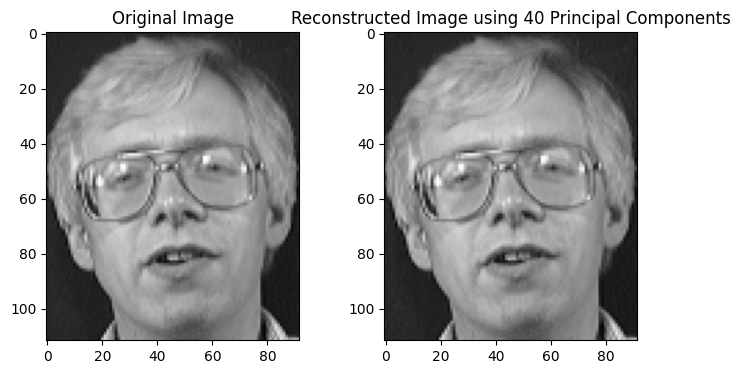

In [36]:
# Display the images
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(original_image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(reconstructed_image, cmap='gray')
ax[1].set_title('Reconstructed Image using {} Principal Components'.format(num_components))
plt.show()

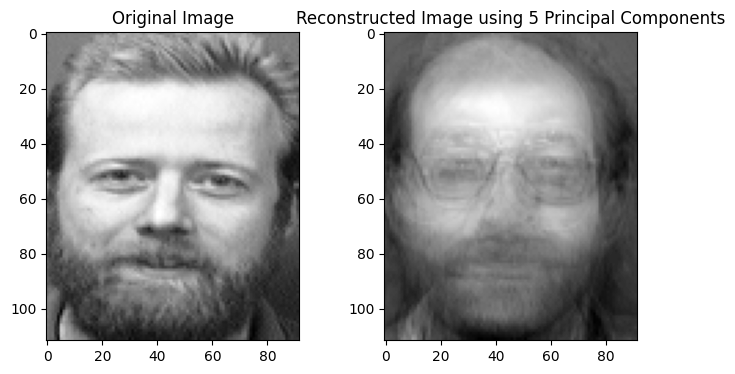

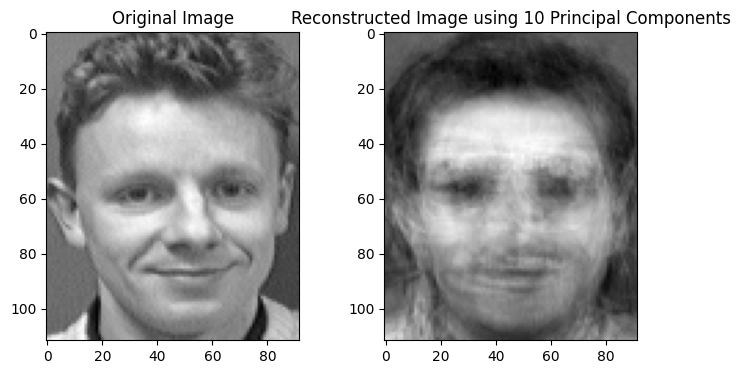

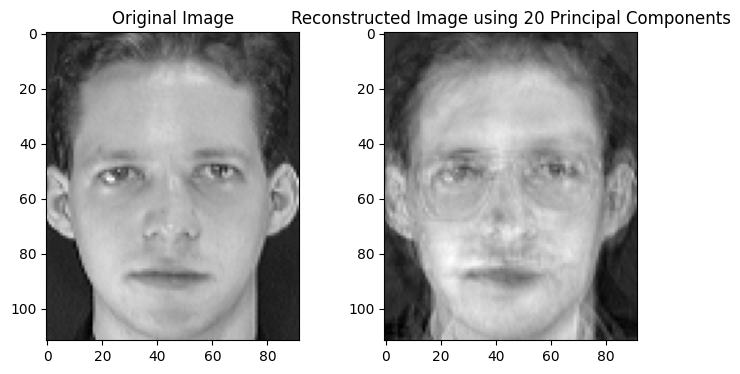

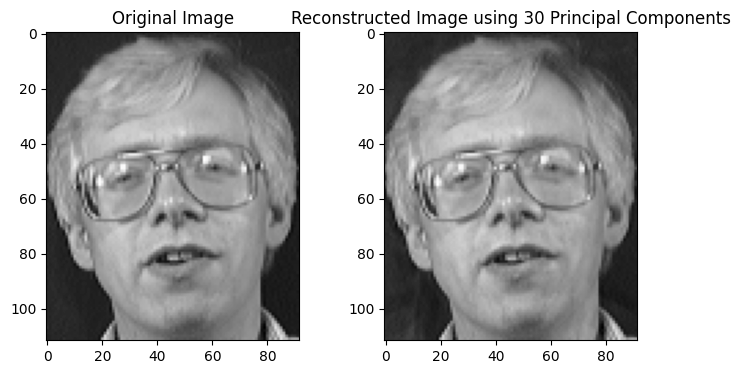

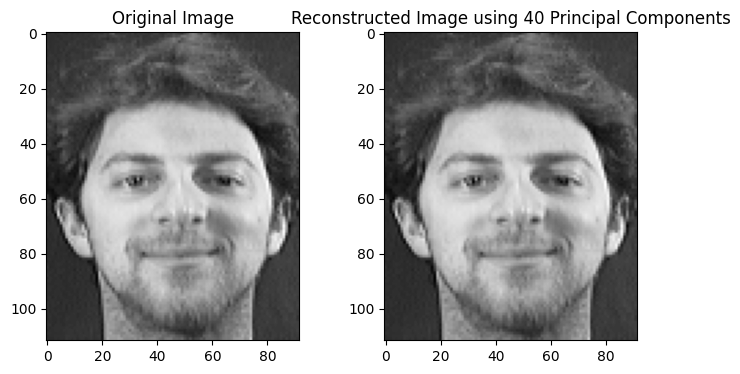

In [37]:
# Loop over each number of principal components
for num_components in num_components_list:
    # Project data onto selected eigenvectors
    projected = np.dot(data_centered, eigenvectors[:, :num_components])

    # Reconstruct images using projected data
    reconstructed = np.dot(projected, eigenvectors[:, :num_components].T) + mean

    # Reshape reconstructed images back to their original shape
    reconstructed = reconstructed.reshape((-1, *images[0].shape))

    # Select a random image to display the original and reconstructed versions side by side
    idx = np.random.randint(data.shape[0])
    original_image = images[idx]
    reconstructed_image = reconstructed[idx]

    # Display the images
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].imshow(original_image, cmap='gray')
    ax[0].set_title('Original Image')
    ax[1].imshow(reconstructed_image, cmap='gray')
    ax[1].set_title('Reconstructed Image using {} Principal Components'.format(num_components))
    plt.show()

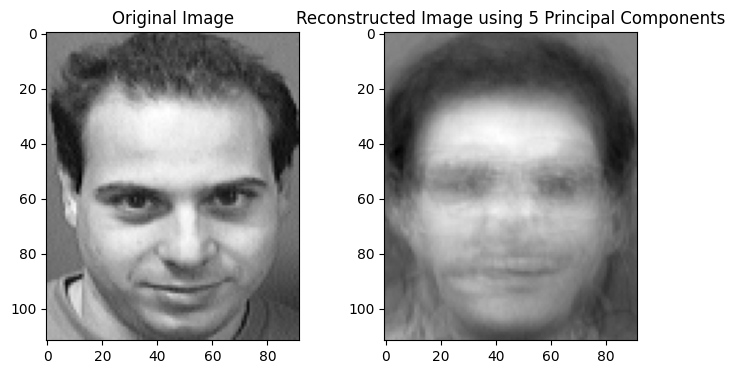

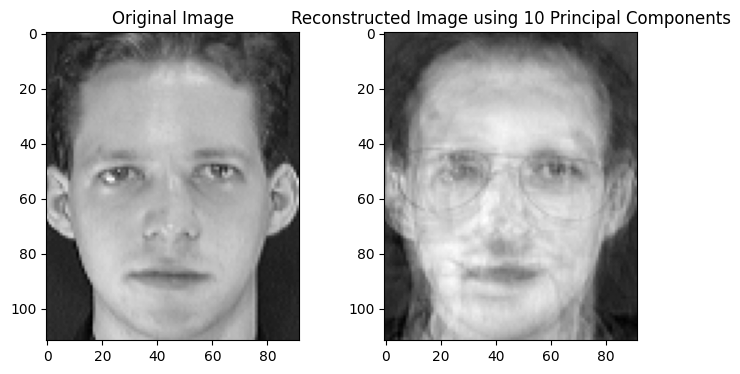

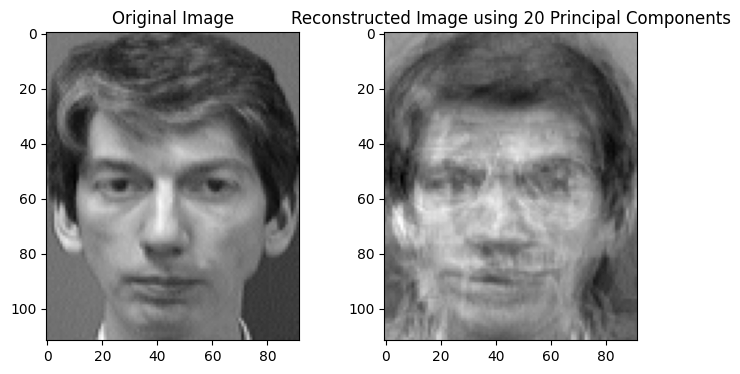

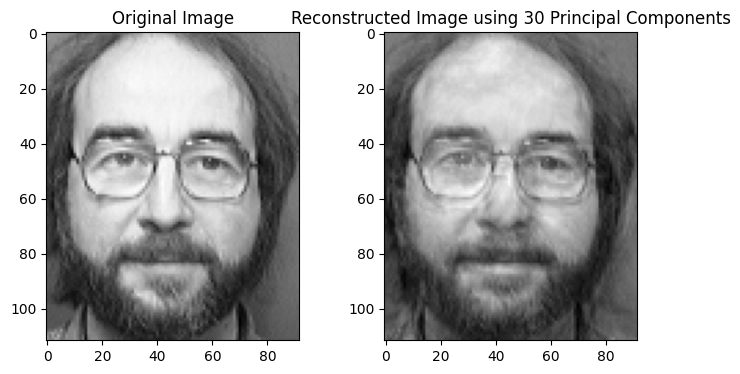

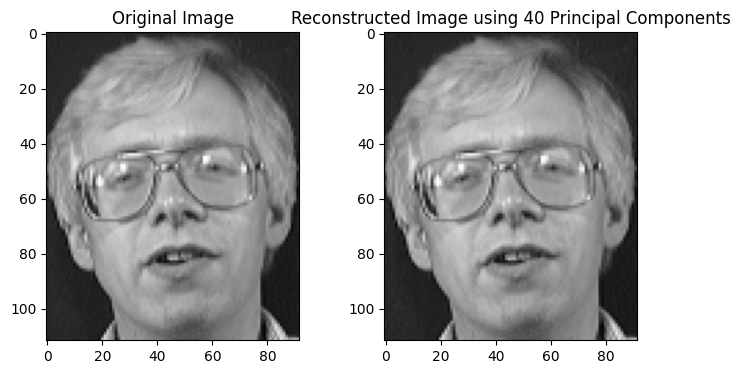

In [38]:
# Loop over each number of principal components
for num_components in num_components_list:
    # Project data onto selected eigenvectors
    projected = np.dot(data_centered, eigenvectors[:, :num_components])

    # Reconstruct images using projected data
    reconstructed = np.dot(projected, eigenvectors[:, :num_components].T) + mean

    # Reshape reconstructed images back to their original shape
    reconstructed = reconstructed.reshape((-1, *images[0].shape))

    # Select a random image to display the original and reconstructed versions side by side
    idx = np.random.randint(data.shape[0])
    original_image = images[idx]
    reconstructed_image = reconstructed[idx]

    # Display the images
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].imshow(original_image, cmap='gray')
    ax[0].set_title('Original Image')
    ax[1].imshow(reconstructed_image, cmap='gray')
    ax[1].set_title('Reconstructed Image using {} Principal Components'.format(num_components))
    plt.show()

In [39]:
# Define a list of numbers of principal components to experiment with
num_components_list = [5, 10, 20, 30, 40, 50, 60,]

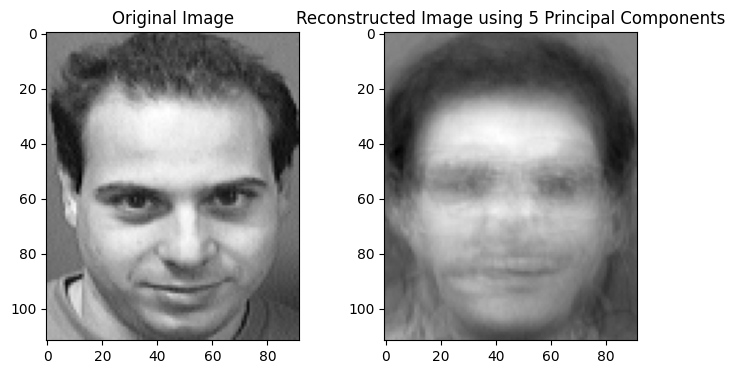

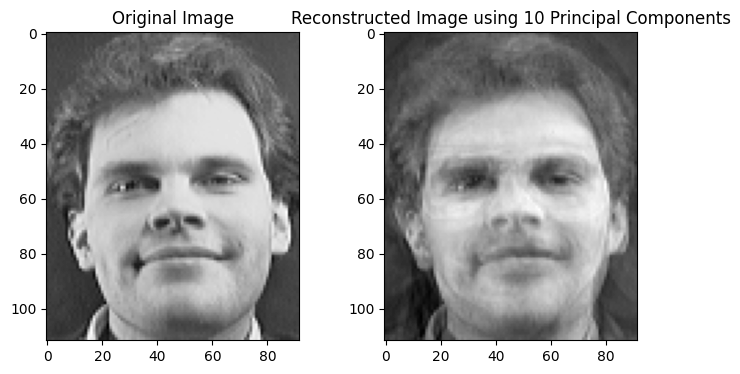

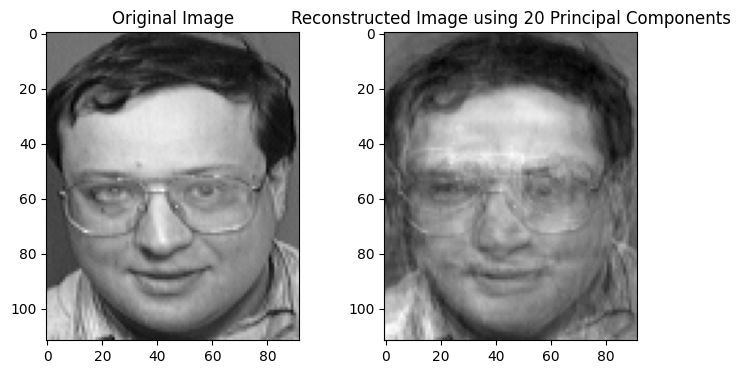

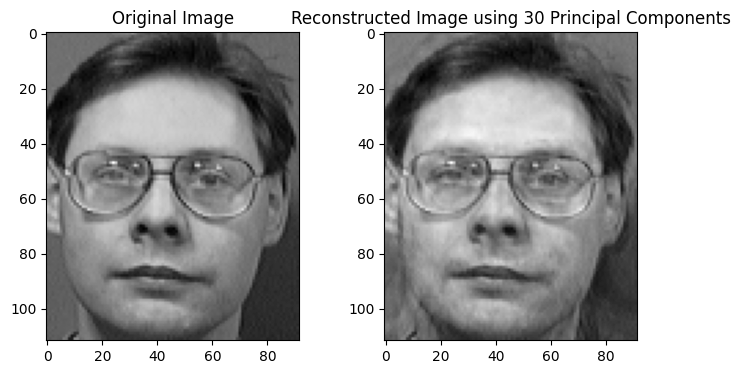

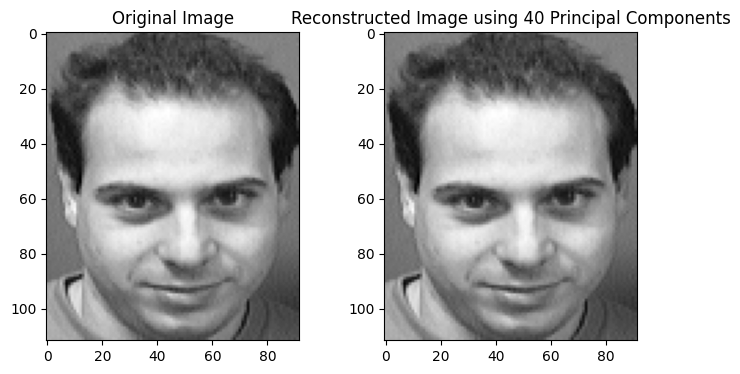

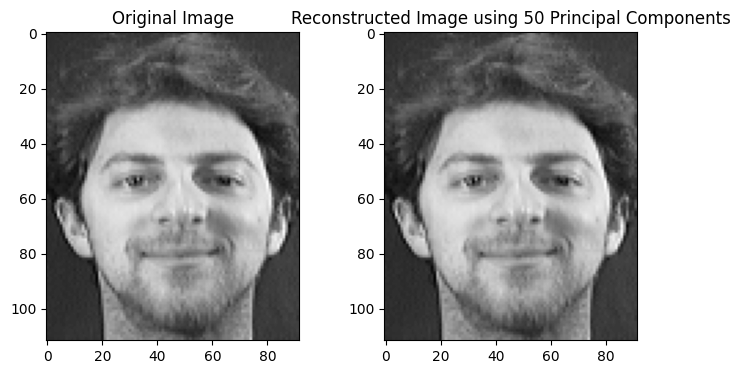

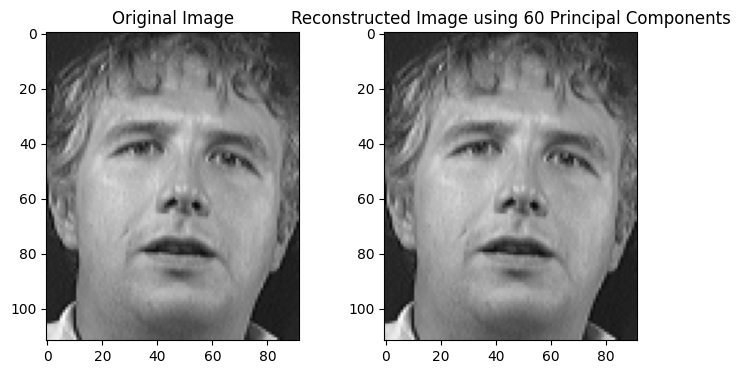

In [40]:
# Loop over each number of principal components
for num_components in num_components_list:
    # Project data onto selected eigenvectors
    projected = np.dot(data_centered, eigenvectors[:, :num_components])

    # Reconstruct images using projected data
    reconstructed = np.dot(projected, eigenvectors[:, :num_components].T) + mean

    # Reshape reconstructed images back to their original shape
    reconstructed = reconstructed.reshape((-1, *images[0].shape))

    # Select a random image to display the original and reconstructed versions side by side
    idx = np.random.randint(data.shape[0])
    original_image = images[idx]
    reconstructed_image = reconstructed[idx]

    # Display the images
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].imshow(original_image, cmap='gray')
    ax[0].set_title('Original Image')
    ax[1].imshow(reconstructed_image, cmap='gray')
    ax[1].set_title('Reconstructed Image using {} Principal Components'.format(num_components))
    plt.show()

In [42]:
# Define a list of numbers of principal components to experiment with
num_components_list = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

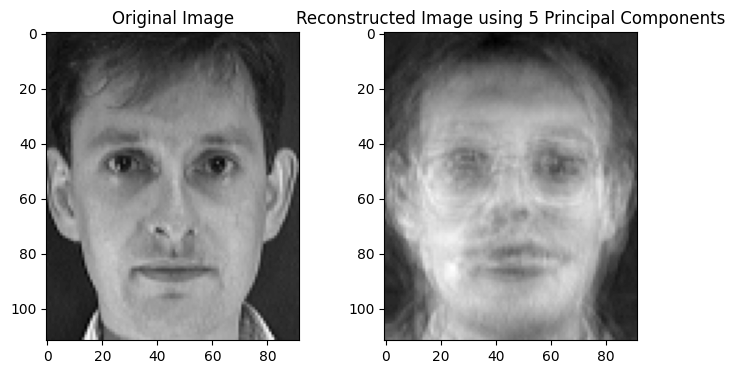

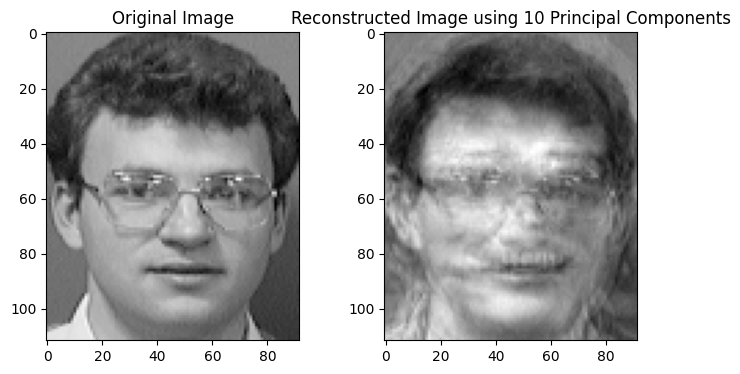

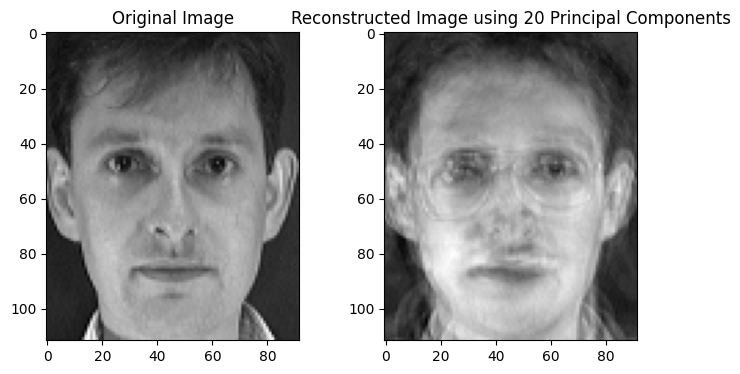

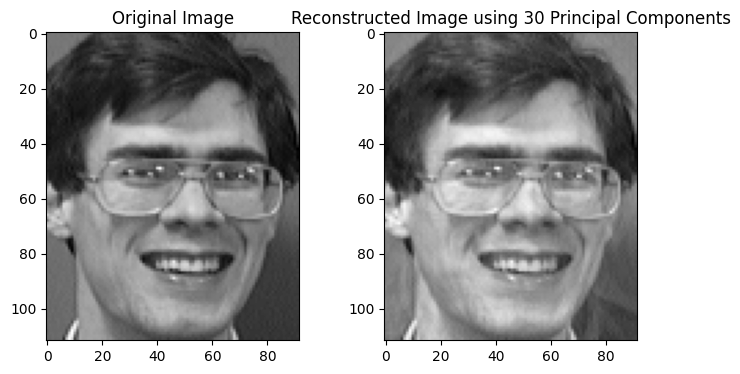

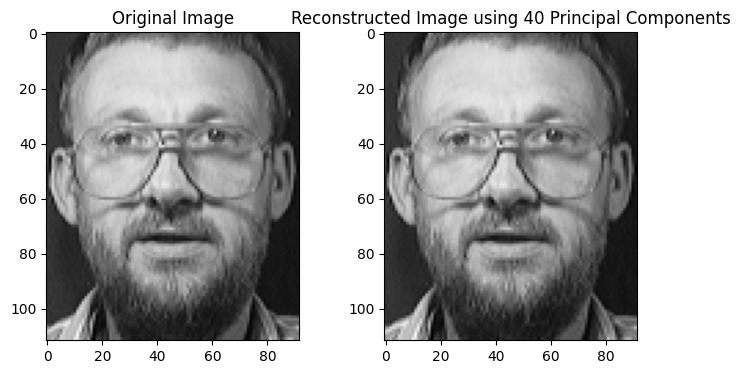

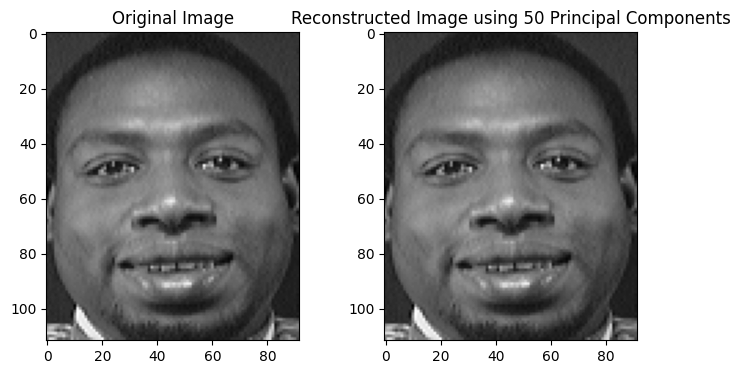

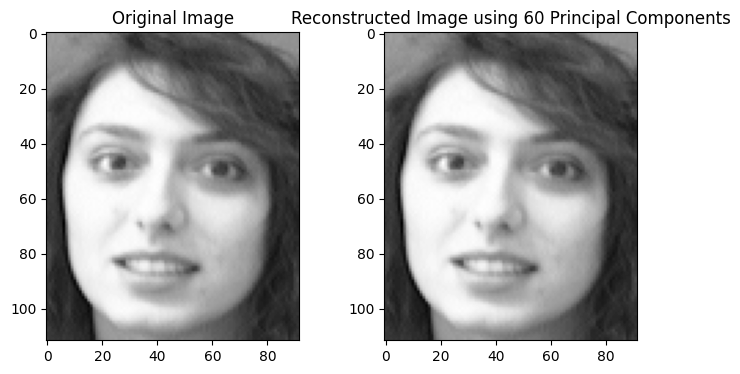

In [41]:
# Loop over each number of principal components
for num_components in num_components_list:
    # Project data onto selected eigenvectors
    projected = np.dot(data_centered, eigenvectors[:, :num_components])

    # Reconstruct images using projected data
    reconstructed = np.dot(projected, eigenvectors[:, :num_components].T) + mean

    # Reshape reconstructed images back to their original shape
    reconstructed = reconstructed.reshape((-1, *images[0].shape))

    # Select a random image to display the original and reconstructed versions side by side
    idx = np.random.randint(data.shape[0])
    original_image = images[idx]
    reconstructed_image = reconstructed[idx]

    # Display the images
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].imshow(original_image, cmap='gray')
    ax[0].set_title('Original Image')
    ax[1].imshow(reconstructed_image, cmap='gray')
    ax[1].set_title('Reconstructed Image using {} Principal Components'.format(num_components))
    plt.show()

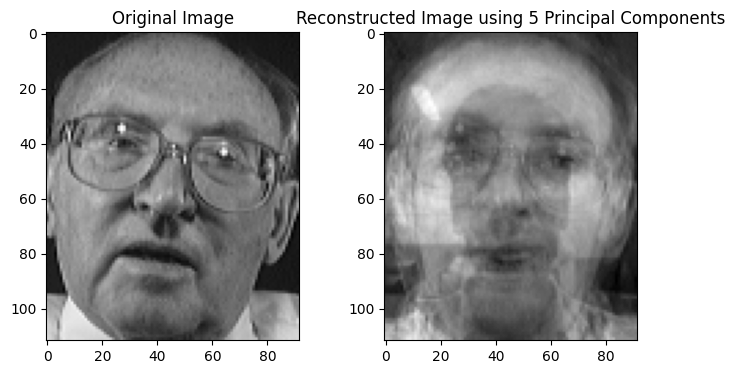

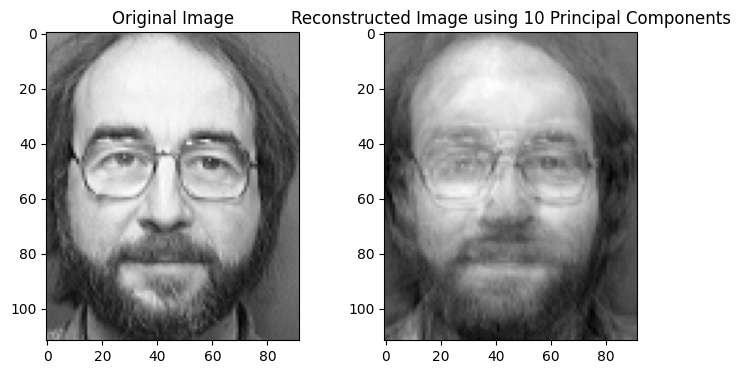

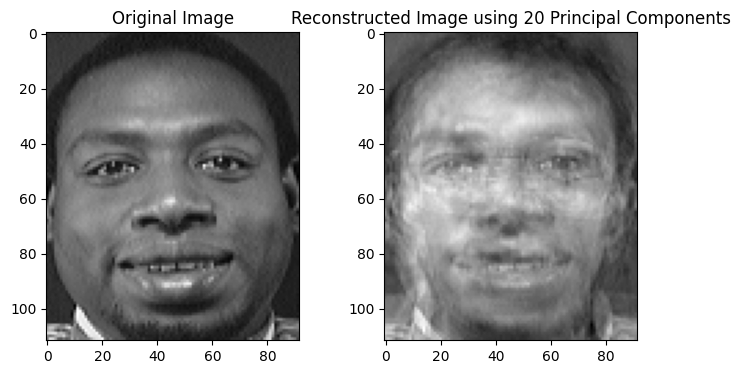

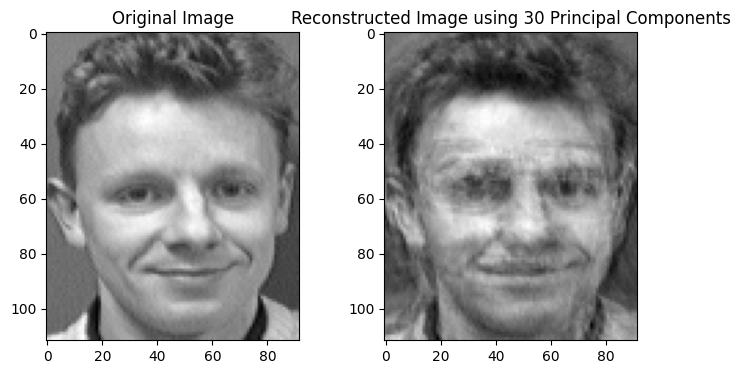

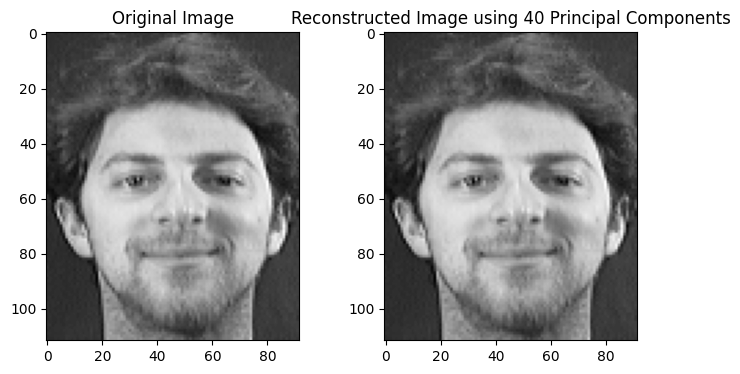

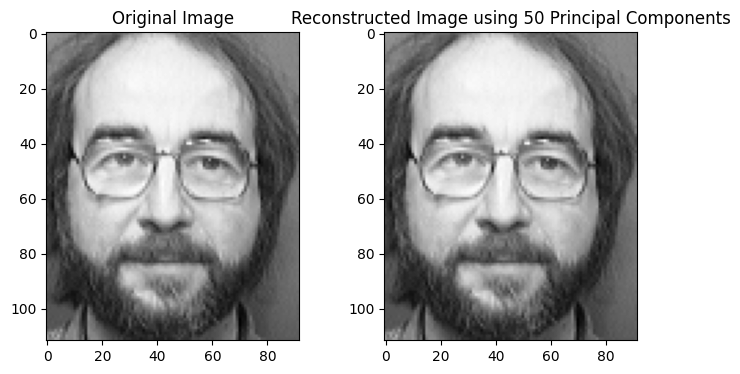

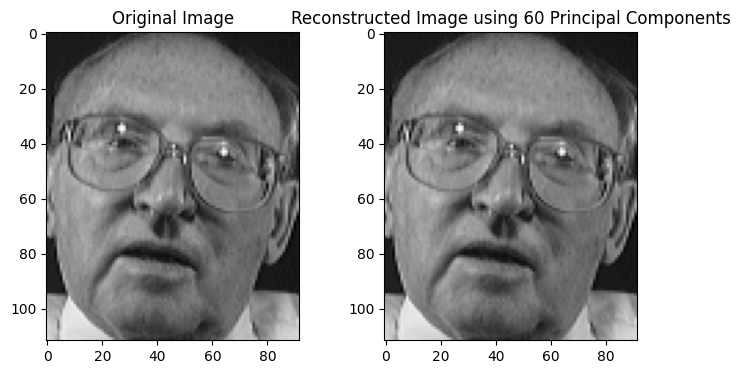

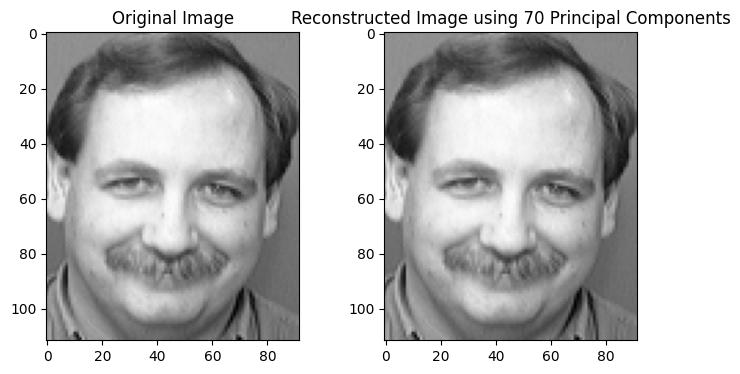

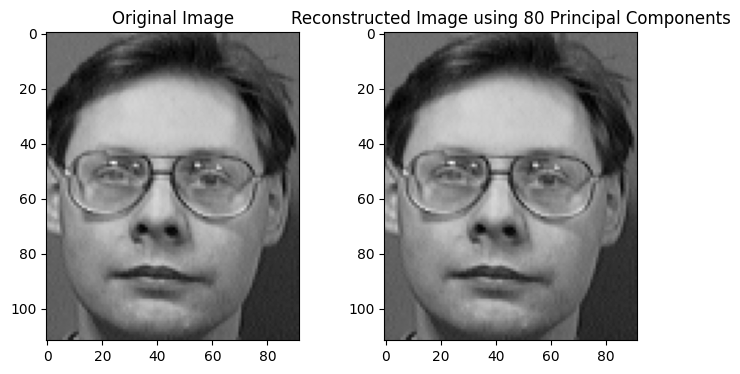

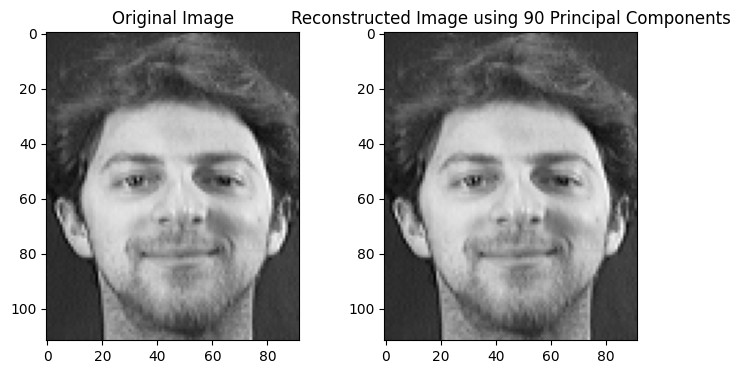

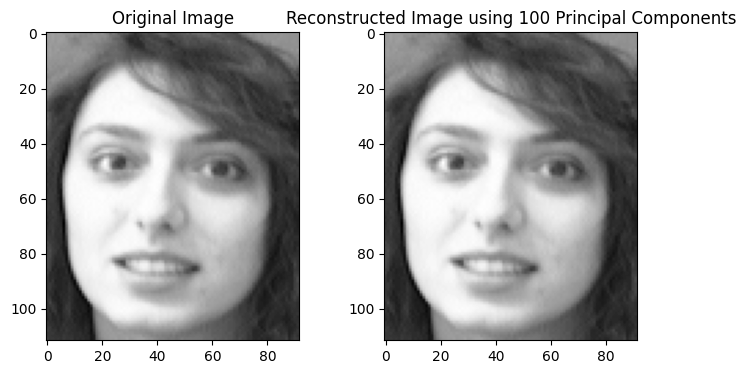

In [43]:
# Loop over each number of principal components
for num_components in num_components_list:
    # Project data onto selected eigenvectors
    projected = np.dot(data_centered, eigenvectors[:, :num_components])

    # Reconstruct images using projected data
    reconstructed = np.dot(projected, eigenvectors[:, :num_components].T) + mean

    # Reshape reconstructed images back to their original shape
    reconstructed = reconstructed.reshape((-1, *images[0].shape))

    # Select a random image to display the original and reconstructed versions side by side
    idx = np.random.randint(data.shape[0])
    original_image = images[idx]
    reconstructed_image = reconstructed[idx]

    # Display the images
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].imshow(original_image, cmap='gray')
    ax[0].set_title('Original Image')
    ax[1].imshow(reconstructed_image, cmap='gray')
    ax[1].set_title('Reconstructed Image using {} Principal Components'.format(num_components))
    plt.show()